In [1]:
USER = "Zisimopoulou"
CLONE_URL = f"https://github.com/{USER}/Food_Vision_Big.git"
get_ipython().system(f"git clone {CLONE_URL}")

import sys
sys.path.append("Food_Vision_Big")

Cloning into 'Food_Vision_Big'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 146 (delta 19), reused 0 (delta 0), pack-reused 93
Receiving objects: 100% (146/146), 44.66 MiB | 35.02 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [2]:
import os
import importlib
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from data.data_loading import load_and_preprocess_data
from models.model_definition import create_model
from training.train import train_model
from metrics.metrics import create_confusion_matrix, plot_f1_scores, visualize_predictions, calculate_metrics, find_most_wrong_predictions

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteT4GBK4/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteT4GBK4/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.
16705208/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_fine_tuning/20231120-094138
Epoch 1/100


2023-11-20 09:41:55.071545: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2368/2368 [==============================] - 706s 276ms/step - loss: 2.2019 - accuracy: 0.4821 - val_loss: 0.9109 - val_accuracy: 0.7548 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 658s 278ms/step - loss: 1.1164 - accuracy: 0.7082 - val_loss: 0.7000 - val_accuracy: 0.8030 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - 662s 279ms/step - loss: 0.8340 - accuracy: 0.7749 - val_loss: 0.6411 - val_accuracy: 0.8234 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - 658s 277ms/step - loss: 0.6517 - accuracy: 0.8223 - val_loss: 0.6349 - val_accuracy: 0.8284 - lr: 1.0000e-04
Epoch 5/100
2368/2368 [==============================] - 660s 278ms/step - loss: 0.5182 - accuracy: 0.8546 - val_loss: 0.6226 - val_accuracy: 0.8279 - lr: 1.0000e-04
Epoch 6/100
2368/2368 [==============================] - ETA: 0s - loss: 0.4141 - accuracy: 0.8846
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2

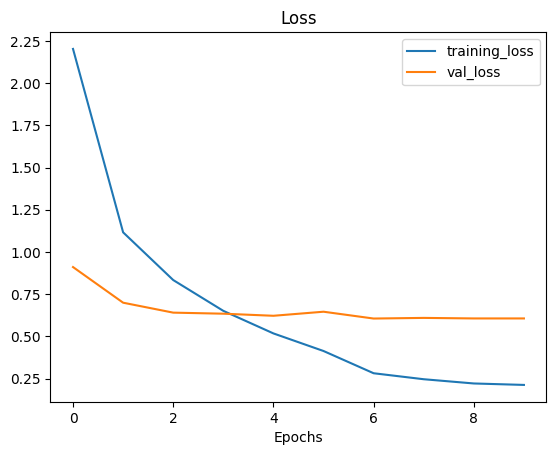

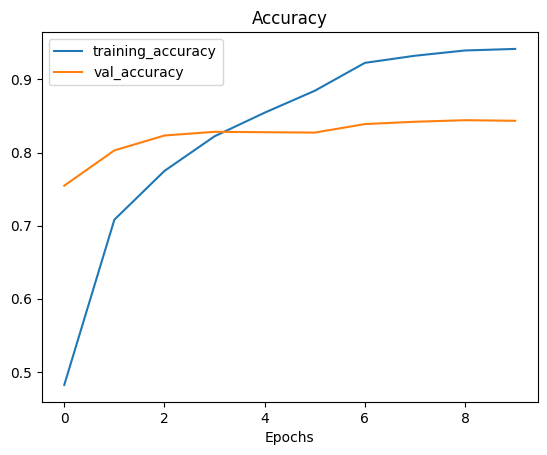

In [3]:
(train_data, test_data), ds_info = load_and_preprocess_data()

class_names = ds_info.features["label"].names

model = create_model(class_names)

train_model(model, train_data, test_data, class_names)

In [7]:
predictions, true_labels = calculate_metrics(model, test_data)

790/790 [==============================] - 43s 55ms/step


In [8]:
sklearn_acc = accuracy_score(true_labels, predictions)
sklearn_acc

0.8368316831683168

In [27]:
create_confusion_matrix(true_labels=true_labels,
                        predictions=predictions,
                        classes=class_names,
                        figsize=(100, 100),
                        text_size=15,
                        norm=False)

In [30]:
plot_f1_scores(true_labels,
               predictions,
               class_names,
               sklearn_acc,
               figure_size=(15, 25))


fatal: destination path 'Food_Vision_Big' already exists and is not an empty directory.


NameError: name 'classification_report_dict' is not defined

In [23]:
find_most_wrong_predictions(true_labels, predictions)

Index: 15, True Label: 85, Predicted Label: 41
Index: 16, True Label: 84, Predicted Label: 44
Index: 19, True Label: 80, Predicted Label: 53
Index: 22, True Label: 17, Predicted Label: 19
Index: 29, True Label: 42, Predicted Label: 67
Index: 30, True Label: 6, Predicted Label: 85
Index: 50, True Label: 98, Predicted Label: 22
Index: 59, True Label: 81, Predicted Label: 64
Index: 71, True Label: 0, Predicted Label: 30
Index: 74, True Label: 56, Predicted Label: 9


In [18]:
  class_report = classification_report(true_labels, predictions)
  print(class_report)

              precision    recall  f1-score   support

           0       0.74      0.54      0.62       250
           1       0.85      0.82      0.84       250
           2       0.89      0.89      0.89       250
           3       0.84      0.88      0.86       250
           4       0.79      0.81      0.80       250
           5       0.75      0.66      0.70       250
           6       0.83      0.90      0.87       250
           7       0.90      0.91      0.91       250
           8       0.60      0.66      0.63       250
           9       0.81      0.75      0.78       250
          10       0.78      0.76      0.77       250
          11       0.83      0.90      0.86       250
          12       0.91      0.92      0.91       250
          13       0.83      0.80      0.81       250
          14       0.77      0.84      0.80       250
          15       0.72      0.70      0.71       250
          16       0.78      0.77      0.78       250
          17       0.92    